### Imports:

In [0]:
!pip install pyramid

In [0]:
!pip install pyramid-arima

In [0]:
#imports:

import warnings
import statsmodels.api as sm
import itertools
from pyramid.arima import auto_arima
from sklearn import metrics
import scipy
from pyramid.arima.stationarity import ADFTest
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from math import sqrt
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import plotly
import plotly.offline as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib as mplt
import matplotlib.pylab as plt
%matplotlib inline
%matplotlib inline


from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

In [0]:
import sys ; print("Python Version---", sys.version)
import numpy ; print("Numpy Version---", numpy.__version__)
import scipy; print("SciPy Version---",scipy.__version__)
import sklearn; print("Scikit-learn Version---", sklearn.__version__)
import pandas; print("Pandas Version---", pandas.__version__)
import statsmodels; print("Statsmodels version---", statsmodels.__version__)
import pyramid; print("Pyramid Version---", pyramid.__version__)
import pip; print("Pip Version---",pip.__version__)

Python Version--- 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Numpy Version--- 1.18.2
SciPy Version--- 1.4.1
Scikit-learn Version--- 0.22.2.post1
Pandas Version--- 0.25.3
Statsmodels version--- 0.10.2
Pyramid Version--- 0.9.0
Pip Version--- 19.3.1


In [0]:
#url ejemplo /content/drive/My Drive/Colab Notebooks/Python/Proyectos/2019-2-simulacion-digital-proyecto/
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My Drive/Colab Notebooks/Python/Proyectos/2019-2-simulacion-digital-proyecto/
!pwd

/content/drive/My Drive/Colab Notebooks/Python/Proyectos/2019-2-simulacion-digital-proyecto
/content/drive/My Drive/Colab Notebooks/Python/Proyectos/2019-2-simulacion-digital-proyecto


In [0]:
%cd /content/drive/My Drive/2019-2-simulacion-digital-proyecto
#cd /content/drive/My Drive/Colab Notebooks/Python/Proyectos/2019-2-simulacion-digital-proyecto/
!pwd

/content/drive/My Drive/2019-2-simulacion-digital-proyecto
/content/drive/My Drive/2019-2-simulacion-digital-proyecto


### [Ingrese nombre de proyecto]

**Integrantes:**

- Jorge Andres Mogotocoro Fajardo - 2160075
- Sergio Andres Dulcey Lizarazo - 2151830
- Nestor Ivan Infante Monsalve - 2150340
- Andres Ricardo Hernandez Torres -2122274

### Objetivo general

- [ - - - ]

### Objetivos especificos

-  [ - - - ]
-  [ - - - ]
-  [ - - - ]

### Preguntas por responder

- **Problema a resolver:**  
R: Predecir el numero de entradas de extranjeros para los proximos meses.
- **¿Como se va resolver?**  
R: Recurriendo a series de tiempo.
- **¿Por qué se necesita resolver este problema?**  
R: Tomando como referencia la situación actual, el COVID19 se ha convertido en un problema de salud mundial en el que Colombia no puede escatimar recursos por lo cual quienes más deberían reforzar sus protocolos de contingencia del virus serian las entidades que registran la entrada y salida de extrangeros en lugares claves como serian aeropuertos y fronteras con otros paises por tanto nuestro propósito seria brindarles un estimado de extranjeros que en los próximos x meses se estima llegarían al país y así preparar medidas de salud en base a ese número. 
- **¿Para que?**  
R: Para tener un estimado de numero de entradas de extranjeros a Colombia, y usarlos en diversos problemas que se presenta actualmente en el pais, especialmente en el COVID19, pero tambien a los distintos ministerios, como ejemplo el ministro de salud para que relacione esos datos con el conjunto de datos en los distintos centros medicos.
- **¿Para quien(es) seria util esta solucion?**  
R: Todos los aeropuertos Colombianos y fronteras que militan en Colombia con otros paises, que reciban personas provenientes de fuera del país.

### Documentacion del problema:

[Dataset](https://www.datos.gov.co/Estad-sticas-Nacionales/Entradas-de-extranjeros-a-Colombia/96sh-4v8d)



- ¿Cuantos aeropuertos en Colombia reciben entrada de extranjeros?  
R: Solo los aeropuertos internacionales que tienen escala a Colombia reciben entada de extranjeros, El dorado por ser el aeropuerto que más rutas internacionales, obviamente debe ser el de mayor llegada de extranjeros a colombia.
Estos son los aeropuertos internacionales:
1. Aeropuerto Internacional El Dorado, Bogotá. 
2. Aeropuerto Internacional José María Córdova, Rionegro – Medellín.
3. Aeropuerto Internacional Alfonso Bonilla Aragón, Palmira – Cali. 
4. Aeropuerto Internacional Rafael Núñez, Cartagena de Indias.
5. Aeropuerto Internacional Ernesto Cortissoz, Soledad – Barranquilla. 
6. Aeropuerto Internacional Gustavo Rojas Pinilla, San Andrés.
7. Aeropuerto Internacional Palonegro, Lebrija – Bucaramanga.
8. Aeropuerto Internacional Matecaña, Pereira. 
9. Aeropuerto Internacional Simón Bolívar, Santa Marta.
10. Aeropuerto Internacional Camilo Daza, Cúcuta. 
11. Aeropuerto Internacional El Edén, La Tebaída – Armenia.
12. Aeropuerto Internacional Alfredo Vásquez Cobo – Leticia.
13. Aeropuerto Internacional Almirante Padilla, Riohacha

Pero no son solo lo aeropuertos, tambien toca tener en cuenta las fronteras que militan en colombia con otros paises: Colombia comparte frontera terrestre con cinco países: Venezuela (2.219 Km), Brasil (1.645 Km), Perú (1.626 Km), Ecuador (586 Km) y Panamá (266 Km). En el caso marítimo, en los dos océanos, nos unen fronteras con: Costa Rica, Ecuador, Haití, Honduras, Jamaica, Nicaragua, Panamá, República Dominicana y Venezuela (en proceso de delimitación).

- ¿Que medidas se han tomado actualmente para la prevencion del COVID19?  
R: 
1. https://www.cdc.gov/coronavirus/2019-ncov/hcp/guidance-prevent-spread-sp.html
2. https://www.cdc.gov/coronavirus/2019-ncov/about/prevention-treatment-sp.html
3. https://www.eluniverso.com/noticias/2020/03/02/nota/7763913/coronavirus-medidas-prevencion-covid-19-oms

En la actualidad no existe una vacuna para prevenir la enfermedad del coronavirus 2019 (COVID-19). La mejor forma de prevenir la enfermedad es evitar la exposición a este virus. Sin embargo, como recordatorio, los CDC siempre recomiendan medidas preventivas cotidianas para ayudar a prevenir la propagación de enfermedades respiratorias. Estas medidas incluyen:

    Evitar el contacto cercano con personas enfermas.
    Evitar tocarse los ojos, la nariz y la boca.
    Quedarse en casa si está enfermo.
    Cubrirse la nariz y la boca con un pañuelo desechable al toser o estornudar y luego botarlo a la basura.
    Limpiar y desinfectar los objetos y las superficies que se tocan frecuentemente, usando un producto común de limpieza de uso doméstico en rociador o toallita.
    Seguir las recomendaciones de los CDC sobre el uso de mascarillas.
        
Los CDC no han hecho recomendaciones para que las personas que no están enfermas usen mascarillas para protegerse de enfermedades respiratorias, incluso del COVID-19.
        Las personas que presentan síntomas del COVID-19 deberían usar mascarillas para ayudar a prevenir la propagación de la enfermedad a los demás. El uso de mascarillas es también esencial para los trabajadores de la salud  y las personas que cuidan de alguien en un entorno cerrado (en la casa o en un establecimiento de atención médica) .
    
    Lávese las manos frecuentemente con agua y jabón por al menos 20 segundos, especialmente después de ir al baño, antes de comer, y después de sonarse la nariz, toser o estornudar.
 Si no cuenta con agua ni jabón, use un desinfectante de manos que contenga al menos un 60 % de alcohol. Lávese las manos siempre con agua y jabón si están visiblemente sucias
- ¿En que medida ayudaria a los aeropuertos conocer un estimado de entradas de extranjeros?  
R: Practicamente los datos recopilados sobre la llegada de extranjeros a Colombia, sirven para conocer la cantidad de extranjeros y sus distintas nacionalidades y el turismo (Donde llegan mas extranjeros) , pero en Colombia se hace una recopilación de datos de acuerdo a los datos entregados por los aeropuertos y fronteras (Ejercito nacional de Colombia y la marina) para tener un estimado y asi usar esos datos para vincularlos con la delicuencia, delitos, inversión, salud, educación, etc... 

Vincularlos significa conocer cuantos extranjeros llegan a colombia y con los otros datos de extranjeros que hicieron delicuencia, delitos, inversion en el pais, enfermos en hospitales, educacion ,etc; Conocer la medida estimada de quienes vienen a esas acciones y quienes llegan a turismo.

### Implementacion

#### Exploracion de los datos

- **Leer el dataset:**

In [0]:
data = pd.read_csv('data/Entradas_de_extranjeros_a_Colombia.csv')

In [0]:
data.describe()

,Año,Femenino,Masculino,Indefinido,Total
count,67669.000000,67669.000000,67669.000000,0.0,67669.000000
mean,2015.314871,122.901373,174.832686,NaN,297.734058
std,2.469163,830.150123,1080.710941,NaN,1895.794232
min,2012.000000,0.000000,0.000000,NaN,1.000000
25%,2013.000000,0.000000,1.000000,NaN,2.000000
50%,2015.000000,2.000000,3.000000,NaN,5.000000
75%,2018.000000,10.000000,19.000000,NaN,29.000000
max,2019.000000,38931.000000,48041.000000,NaN,82609.000000


In [0]:
data.head()

,Año,Mes,Nacionalidad,Femenino,Masculino,Indefinido,Total,Nueva columna georreferenciada
0,2012,Enero,Islas Alboran y Perejil,1,0,NaN,1,POINT (4697157 -74140516)
1,2012,Enero,Albania,1,2,NaN,3,POINT (4697157 -74140516)
2,2012,Enero,Alemania,11,16,NaN,27,POINT (-4191162 -69941498)
3,2012,Enero,Alemania,1,1,NaN,2,POINT (0.33002 -76876446)
4,2012,Enero,Alemania,63,102,NaN,165,POINT (0.81488 -77356)


In [0]:
data.tail()

,Año,Mes,Nacionalidad,Femenino,Masculino,Indefinido,Total,Nueva columna georreferenciada
67664,2019,Junio,Desconocido,5,4,NaN,9,POINT (10446304 -75516486)
67665,2019,Junio,Desconocido,0,1,NaN,1,POINT (10886686 -74776479)
67666,2019,Julio,Desconocido,101,163,NaN,264,POINT (4697157 -74140516)
67667,2019,Julio,Desconocido,7,15,NaN,22,POINT (6170465 -7542726)
67668,2019,Julio,Desconocido,1,0,NaN,1,POINT (7819 -72453013)


In [0]:
data.dtypes

Año                                 int64
Mes                                object
Nacionalidad                       object
Femenino                            int64
Masculino                           int64
Indefinido                        float64
Total                               int64
Nueva columna georreferenciada     object
dtype: object

In [0]:
print (data.shape)

(67669, 8)


- **Exploracion general de los datos**

En esta seccion se pretende extraer informacion general de los datos como, ¿Cual es la nacionalidad mas frecuente? ¿Cuanto porcentaje de la poblacion es hombre y cual es mujer? y posteriormente intentar resumirla en graficos simples.

#### Tratamiento de datos

**Eliminar las columnas que no aportan a los datos:**

In [0]:
del data['Indefinido']
del data['Nueva columna georreferenciada']
del data['Nacionalidad']
del data['Femenino']
del data['Masculino']

**Crea una biblioteca, para reemplazar en los meses de string a int**

In [0]:
data["Mes"] = data["Mes"].astype(str)
mes={
    'Enero':'1',
    'Febrero':'2',
    'Marzo':'3',
    'Abril':'4',
    'Mayo':'5', 
    'Junio':'6',
    'Julio':'7',
    'Agosto':'8',
    'Septiembre':'9',
    'Octubre':'10',
    'Noviembre':'11',
    'Diciembre':'12'
  
}
data["Mes"].replace(mes , inplace=True)

In [0]:
data.tail()

,Año,Mes,Total
67664,2019,6,9
67665,2019,6,1
67666,2019,7,264
67667,2019,7,22
67668,2019,7,1


In [0]:
data["Mes"].head()

0    1
1    1
2    1
3    1
4    1
Name: Mes, dtype: object

**Crea una columna de Unos, llamada dia.**

In [0]:
data['dia']= pd.Series(np.ones(data.shape[0]),dtype=int)

In [0]:
data.tail()

,Año,Mes,Total,dia
67664,2019,6,9,1
67665,2019,6,1,1
67666,2019,7,264,1
67667,2019,7,22,1
67668,2019,7,1,1


Concatena la fecha 

In [0]:
da1 = pd.DataFrame({'year':data['Año'],
                    'month':data['Mes'],
                    'day':data['dia'],
    
})

fecha=pd.to_datetime(da1)
fecha.head()

a={
    'Fecha':fecha,
    'Total':data['Total']
}
df=pd.DataFrame(a)
df.head()

,Fecha,Total
0,2012-01-01,1
1,2012-01-01,3
2,2012-01-01,27
3,2012-01-01,2
4,2012-01-01,165


In [0]:
df.tail()

,Fecha,Total
67664,2019-06-01,9
67665,2019-06-01,1
67666,2019-07-01,264
67667,2019-07-01,22
67668,2019-07-01,1


**Agrupar fechas iguales y sumar datos**

In [0]:
result = (df.groupby(("Fecha")) # Agrupar
          .Total    # Quedarse con la columna Total
          .apply(sum)       # Calcular su suma
          .reset_index())   
df1= pd.DataFrame(result)
df1.tail()

,Fecha,Total
86,2019-03-01,334034
87,2019-04-01,324734
88,2019-05-01,330462
89,2019-06-01,329137
90,2019-07-01,287


**Borar el indice 90 [Fila]**

In [0]:
df1.drop([90], inplace=True)

In [0]:
df1.tail()

,Fecha,Total
85,2019-02-01,330865
86,2019-03-01,334034
87,2019-04-01,324734
88,2019-05-01,330462
89,2019-06-01,329137


**Borra los indices:**

In [0]:
df1.set_index('Fecha',inplace=True)

In [0]:
df1.head()

,Total
Fecha,
2012-01-01,140182
2012-02-01,141963
2012-03-01,140409
2012-04-01,128041
2012-05-01,123503


In [0]:
data= df1['Total']

In [0]:
data.tail()

Fecha
2019-02-01    330865
2019-03-01    334034
2019-04-01    324734
2019-05-01    330462
2019-06-01    329137
Name: Total, dtype: int64

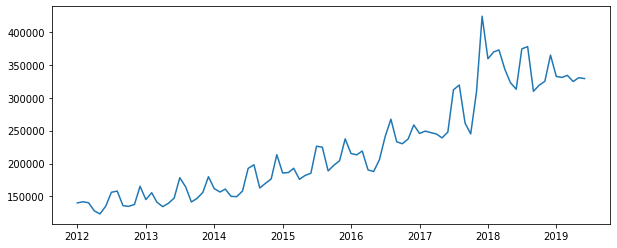

In [0]:
plt.figure(figsize=(10,4))
plt.plot(data)

#### Implementacion de modelos

**Modelo ARIMA**

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    ## Prueba de Dickey-fuller: esta es una de las pruebas estadísticas para verificar la estacionariedad. 
    #Primero consideramos la hipótesis nula: la serie temporal no es estacionaria. 
    #El resultado del resto contendrá la estadística de prueba y el valor crítico para diferentes niveles de 
    #confianza. La idea es tener estadísticas de prueba inferiores al valor crítico, en este caso podemos rechazar 
    #la hipótesis nula y decir que esta serie de tiempo es estacionaria
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

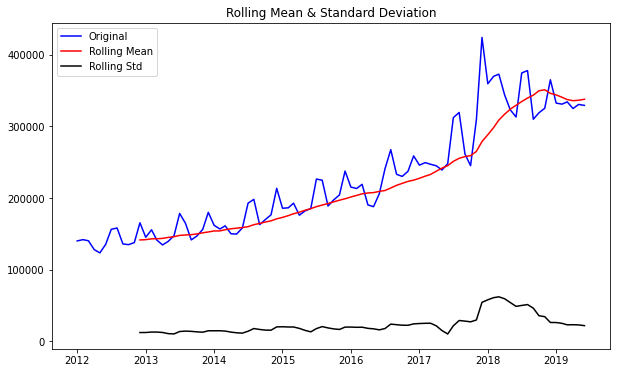

Results of Dickey-Fuller Test:
Test Statistic                 -0.294413
p-value                         0.926292
#Lags Used                     12.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


In [0]:
test_stationarity(data)

si test statistic(p_value)< Critical Value, para que sea estacionaria
Si no es estacionaria se aplica el ts_log

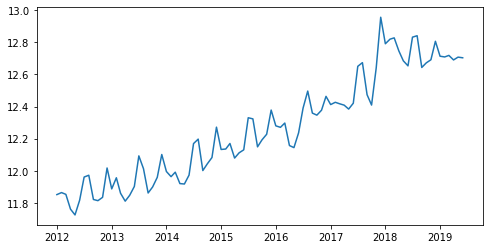

In [0]:
ts_log = np.log(data)
plt.figure(figsize=(8,4))
plt.plot(ts_log)

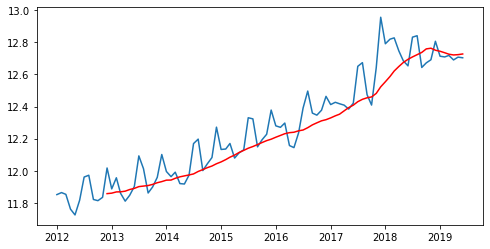

In [0]:
rolmean = ts_log.rolling(window=12).mean()  ###media del ventaneo??
plt.figure(figsize = (8,4))
plt.plot(ts_log)
plt.plot(rolmean, 'red')

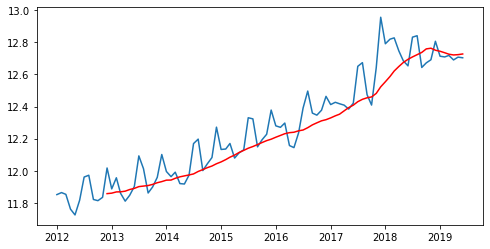

In [0]:
rolmean = ts_log.rolling(window=12).mean()  ###media del ventaneo??
plt.figure(figsize = (8,4))
plt.plot(ts_log)
plt.plot(rolmean, 'red')

In [0]:
# Now subtract the rolling mean from the original series.
ts_log_rolmean_diff = ts_log- rolmean
ts_log_rolmean_diff.head(13)

Fecha
2012-01-01         NaN
2012-02-01         NaN
2012-03-01         NaN
2012-04-01         NaN
2012-05-01         NaN
2012-06-01         NaN
2012-07-01         NaN
2012-08-01         NaN
2012-09-01         NaN
2012-10-01         NaN
2012-11-01         NaN
2012-12-01    0.159892
2013-01-01    0.026580
Name: Total, dtype: float64

In [0]:
ts_log_rolmean_diff.dropna(inplace=True)
ts_log_rolmean_diff.head()

Fecha
2012-12-01    0.159892
2013-01-01    0.026580
2013-02-01    0.088230
2013-03-01   -0.008928
2013-04-01   -0.062313
Name: Total, dtype: float64

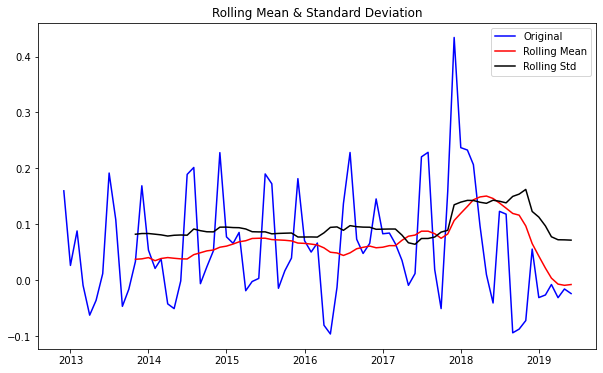

Results of Dickey-Fuller Test:
Test Statistic                 -2.288106
p-value                         0.175833
#Lags Used                     12.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64


In [0]:
test_stationarity(ts_log_rolmean_diff)

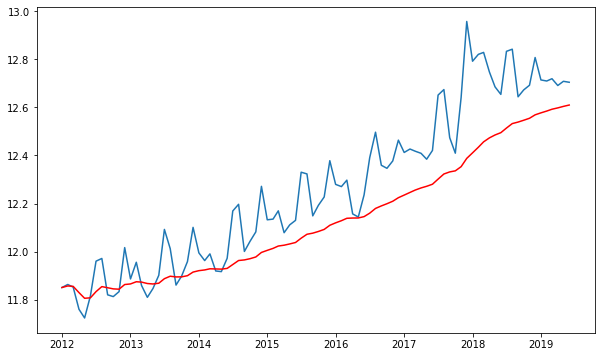

In [0]:
exp_emwa = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(exp_emwa, color='red')


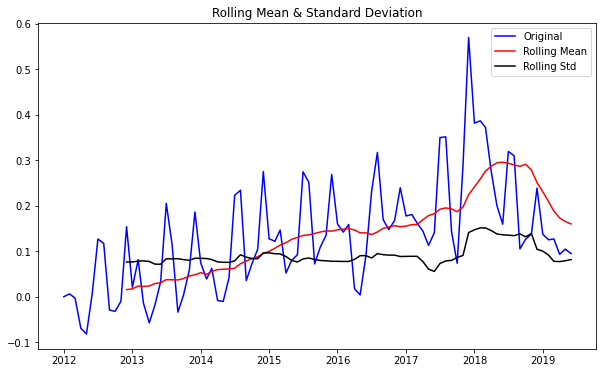

Results of Dickey-Fuller Test:
Test Statistic                 -1.760254
p-value                         0.400365
#Lags Used                     12.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


In [0]:
ts_log_emwa_diff = ts_log- exp_emwa
test_stationarity(ts_log_emwa_diff)

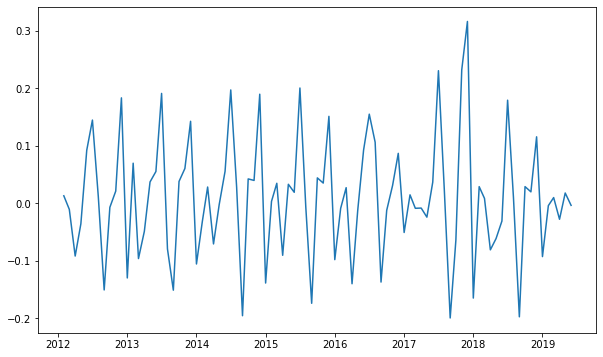

In [0]:
ts_log_diff_shifting = ts_log - ts_log.shift()
plt.plot(ts_log_diff_shifting)

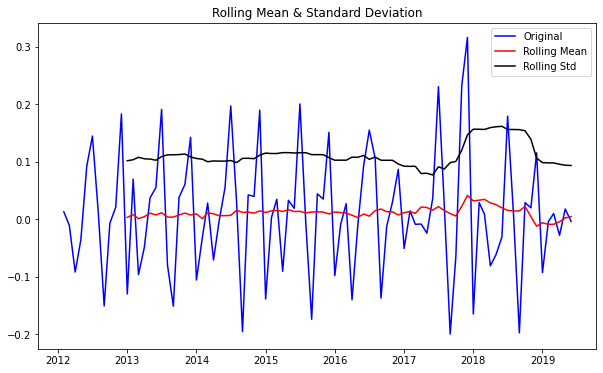

Results of Dickey-Fuller Test:
Test Statistic                 -2.654397
p-value                         0.082267
#Lags Used                     11.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


In [0]:
ts_log_diff_shifting.dropna(inplace=True)
test_stationarity(ts_log_diff_shifting)

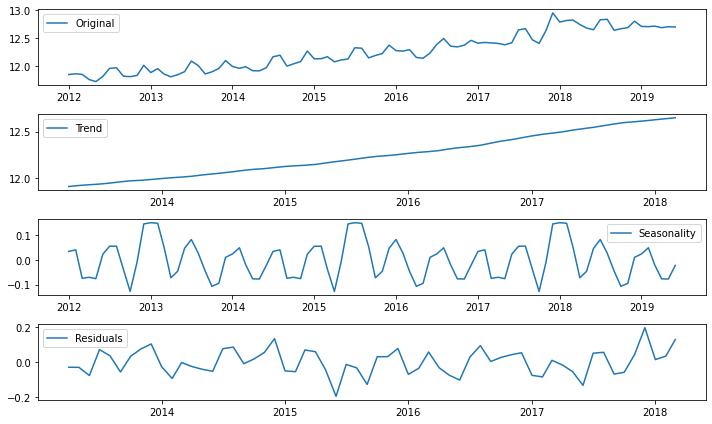

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

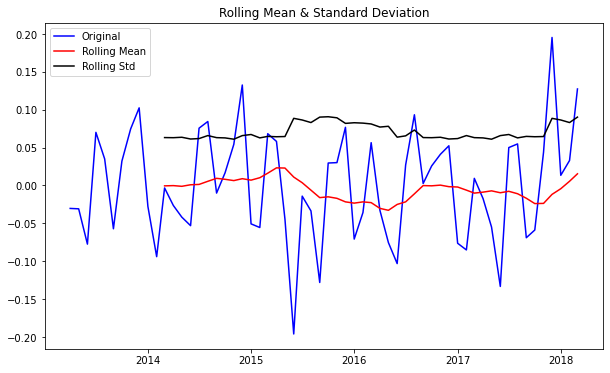

Results of Dickey-Fuller Test:
Test Statistic                 -2.780810
p-value                         0.061068
#Lags Used                      7.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [0]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

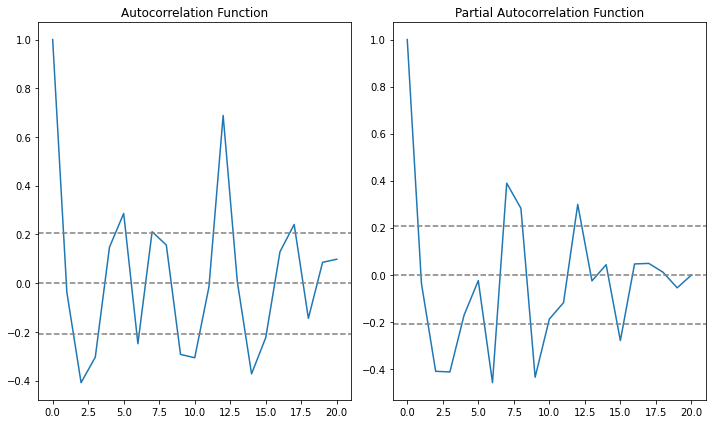

In [0]:
#ACF & PACF plots

lag_acf = acf(ts_log_diff_shifting, nlags=20)
lag_pacf = pacf(ts_log_diff_shifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff_shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff_shifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff_shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff_shifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

q se calcula de autocorrelation function y el p se calcula de partial autocorrelation function

 (p=ar,d=i (al no ser estacionaria es 0) 0,q=ma)

 si es estacionaria, se pasa data


Plotting AR model


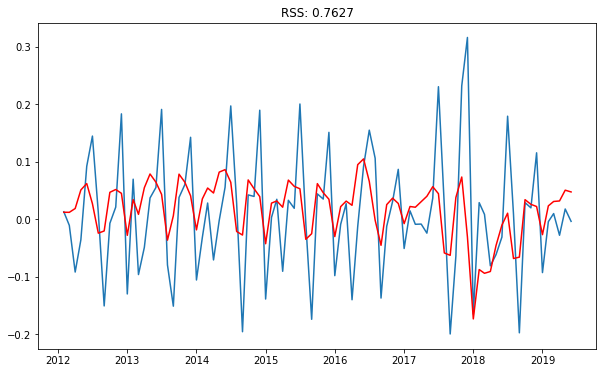

In [0]:
model = ARIMA(ts_log, order=(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff_shifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - ts_log_diff_shifting)**2))
print('Plotting AR model')


El RSS debe estar cerca de 1,
en el grafico lo rojo es lo que predice y lo azul son los datos.

**Predicciòn Futura en ARIMA**

In [0]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head(89))

Fecha
2012-02-01    0.00959
2012-03-01    0.00959
2012-04-01    0.00959
2012-05-01    0.00959
2012-06-01    0.00959
               ...   
2019-02-01    0.00959
2019-03-01    0.00959
2019-04-01    0.00959
2019-05-01    0.00959
2019-06-01    0.00959
Length: 89, dtype: float64


In [0]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head(89))

Fecha
2012-02-01    0.009590
2012-03-01    0.019181
2012-04-01    0.028771
2012-05-01    0.038361
2012-06-01    0.047951
                ...   
2019-02-01    0.815171
2019-03-01    0.824762
2019-04-01    0.834352
2019-05-01    0.843942
2019-06-01    0.853532
Length: 89, dtype: float64


In [0]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head(89)

Fecha
2012-01-01    11.850697
2012-02-01    11.860287
2012-03-01    11.869877
2012-04-01    11.879468
2012-05-01    11.889058
                ...    
2019-01-01    12.656278
2019-02-01    12.665868
2019-03-01    12.675459
2019-04-01    12.685049
2019-05-01    12.694639
Length: 89, dtype: float64

In [0]:
predictions_ARIMA_log.shape

(90,)

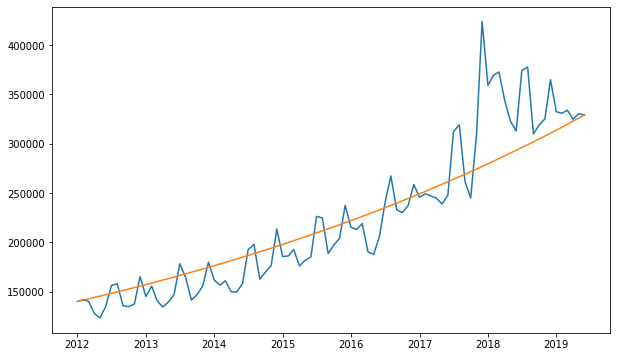

In [0]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)

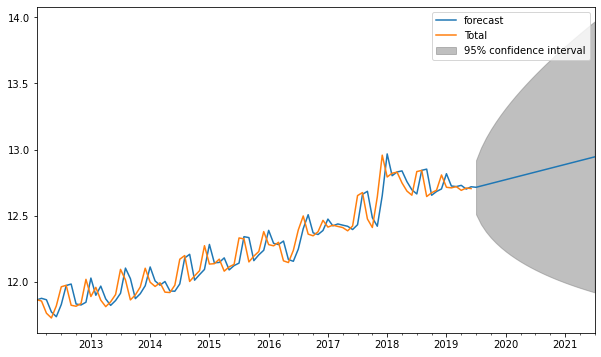

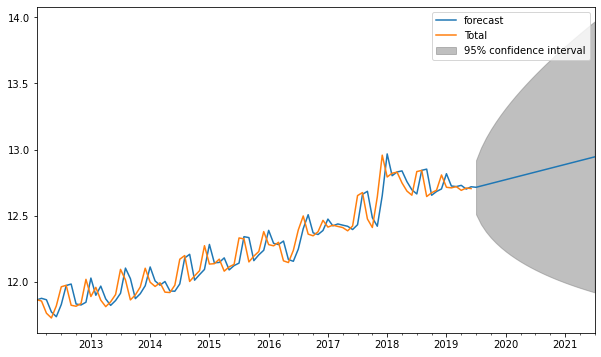

In [0]:
#We have 144(existing data of 12 yrs in months) data points. 
#And we want to forecast for additional 120 data points or 10 yrs.
results_ARIMA.plot_predict(1,114) 
#x=results_ARIMA.forecast(steps=120)

In [0]:
results_ARIMA.forecast(steps=2)

(array([12.71381961, 12.72340986]),
 array([0.10467293, 0.14802987]),
 array([[12.50866444, 12.91897478],
        [12.43327664, 13.01354308]]))

**MODELO HOLT WINTER**

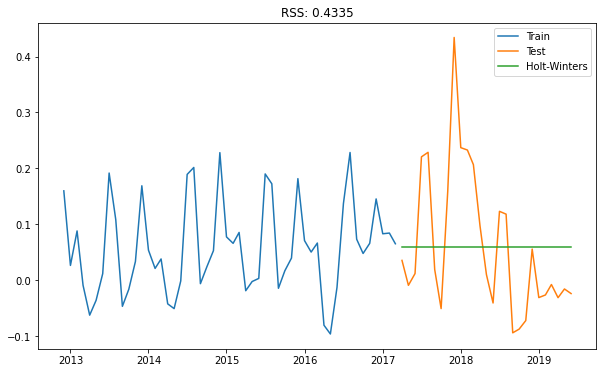

In [0]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
train_size = int(len(ts_log_rolmean_diff) * 0.66)
train11, test11 = ts_log_rolmean_diff[:train_size], ts_log_rolmean_diff[train_size:]

model = ExponentialSmoothing(train11)
model_fit = model.fit()
dict=model.params
params=np.array(list(dict.items()))
dates=test11.index.astype(str)
results_HOLTWINTER = model.fit()

pred = pd.Series(model_fit.forecast(len(test11)).values, index=test11.index)
plt.title('RSS: %.4f'%sum((pred[1:]- test11[1:])**2))
plt.plot(train11, label='Train')
plt.plot(test11, label='Test')

plt.plot(pred, label='Holt-Winters')
plt.legend(loc='best')

#### Otros modelos y otra forma de evidenciar las series de tiempo:


 **Auto ARIMA y Modelo ARIMA**

ERROR! Session/line number was not unique in database. History logging moved to new session 64


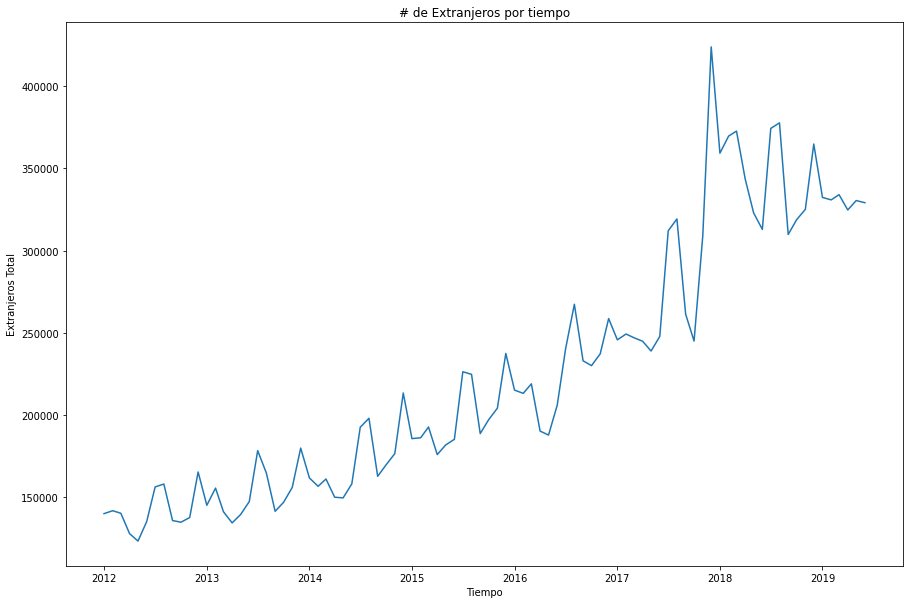

In [0]:
plt.figure(figsize=(15,10))
plt.plot(df1)
plt.xlabel('Tiempo')
plt.ylabel('Extranjeros Total')
plt.title('# de Extranjeros por tiempo')
plt.show;

In [0]:
decomposition1 = seasonal_decompose(df1, model= 'multiplicative')

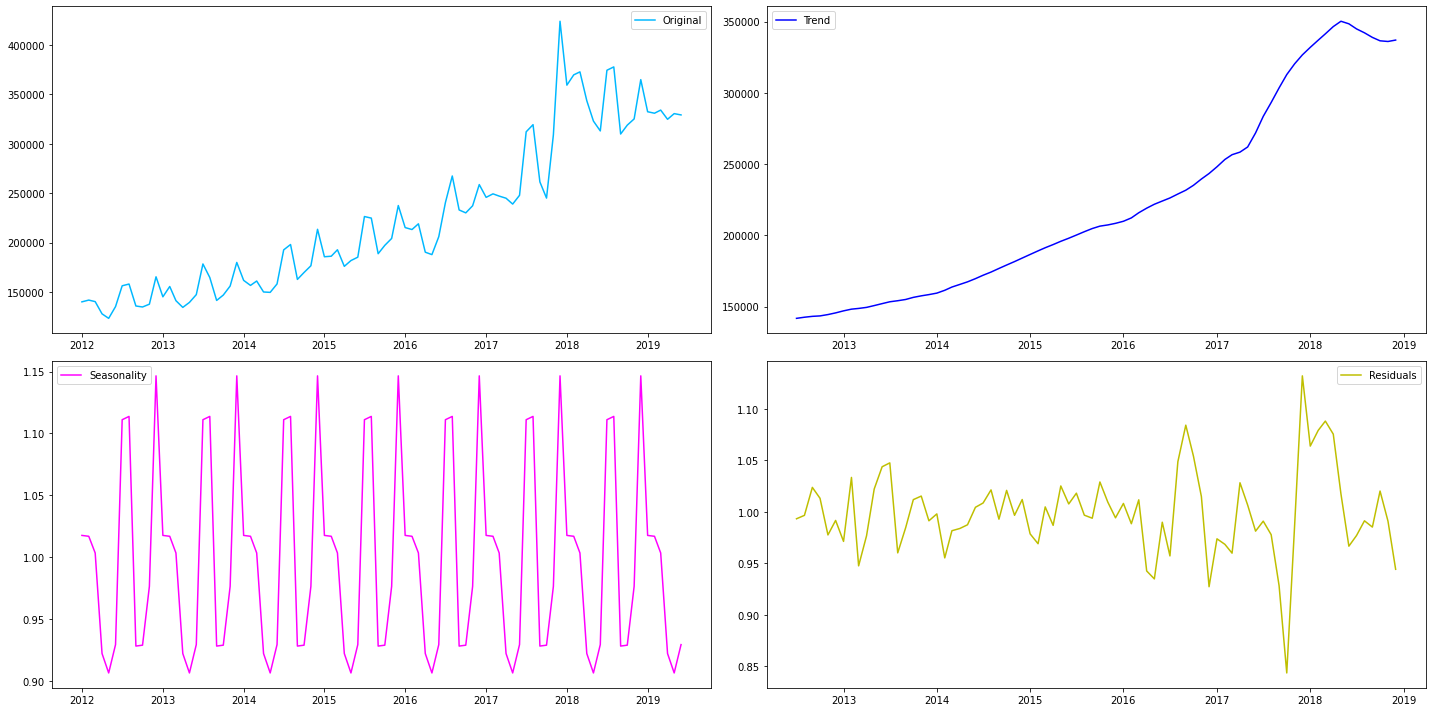

In [0]:
plt.figure(figsize=(20,10))

trend1 = decomposition1.trend
seasonal1 = decomposition1.seasonal
residual1 = decomposition1.resid


plt.subplot(221)
plt.plot(df1,color= '#00b8ff',label='Original')
plt.legend(loc='best')

plt.subplot(222)
plt.plot(trend1,'b', label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal1,color= '#ff00ff', label='Seasonality')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(residual1,'y', label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show();

In [0]:
decomposition2 = seasonal_decompose(df1, model= 'additvie')

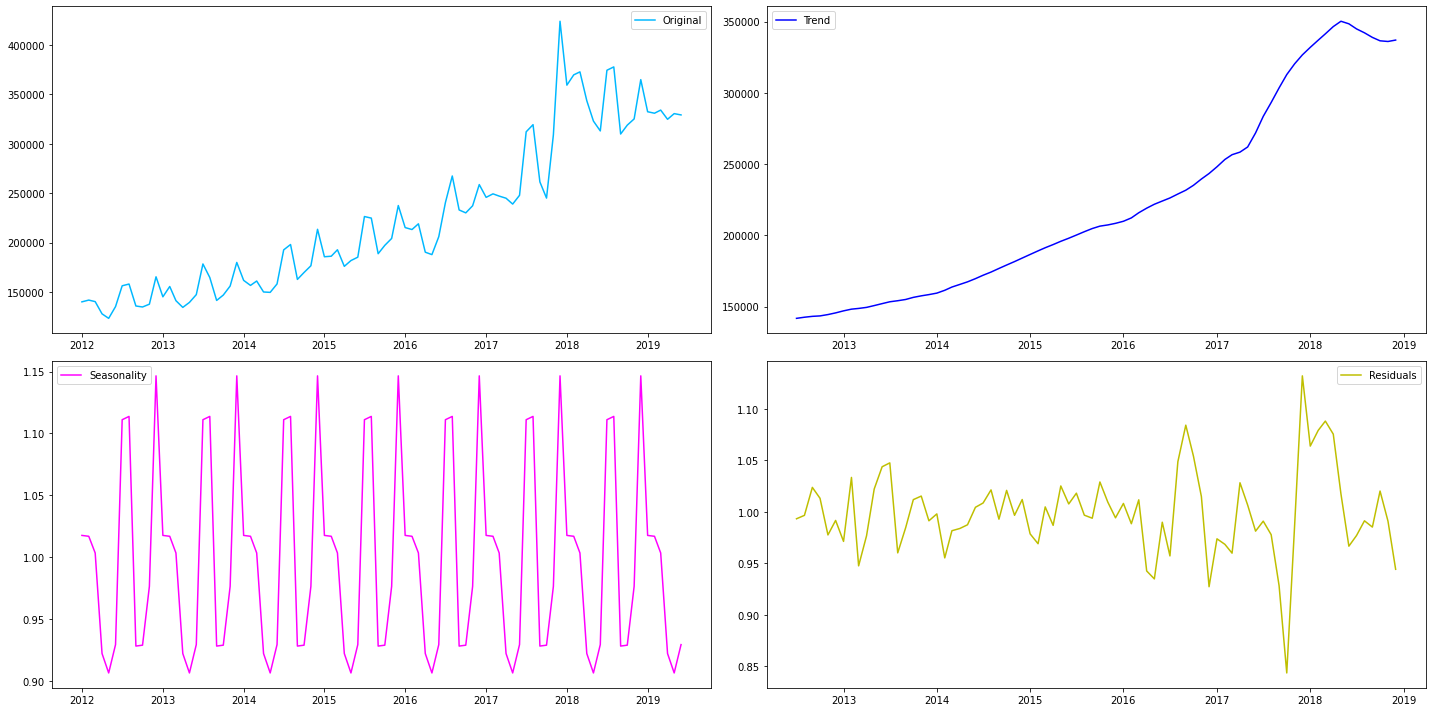

In [0]:
plt.figure(figsize=(20,10))

trend2 = decomposition1.trend
seasonal2 = decomposition1.seasonal
residual2 = decomposition1.resid


plt.subplot(221)
plt.plot(df1,color= '#00b8ff',label='Original')
plt.legend(loc='best')

plt.subplot(222)
plt.plot(trend2,'b', label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal2,color= '#ff00ff', label='Seasonality')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(residual2,'y', label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show();

In [0]:
adf_test = ADFTest(alpha=0.5)
adf_test.is_stationary(df1)

(0.4916741279896567, True)

In [0]:
train, test = df1[:79], df1[80:]



In [0]:
Arima_model = auto_arima(train, start_p=1, start_q=1, max_p=8, max_q=8,
                         start_P=0, start_Q=0, max_P=8, max_Q=8,
                         m=12, seasonal=True, trace=True, d=1, D=1,
                         error_action='warn', suppress_warnings=True,
                         stepwise=True, random_state=20,n_fits=30)
Arima_model.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1492.510, BIC=1501.268, Fit time=0.123 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1489.508, BIC=1493.888, Fit time=0.018 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1491.084, BIC=1499.842, Fit time=0.209 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1491.116, BIC=1499.874, Fit time=0.172 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1489.530, BIC=1496.099, Fit time=0.104 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1489.508, BIC=1496.077, Fit time=0.116 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1491.047, BIC=1499.805, Fit time=0.149 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1492.902, BIC=1503.850, Fit time=0.311 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_orde

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   79
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood                -741.754
Date:                            Mon, 30 Mar 2020   AIC                           1489.508
Time:                                    18:17:47   BIC                           1496.077
Sample:                                         0   HQIC                          1492.103
                                             - 79                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    865.8939   2098.986      0.413      0.680   -3248.043    4979.831
ma.S.L12      -0.1593      0.124     -1.282      0.200      -0.403       0.084
sigma2      3.487e+08      0.076    4.6e+09      0.000    3.49e+08    3.49e+08
===================================================================================
Ljung-Box (Q):                       30.77   Jarque-Bera (JB):               244.65
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               8.08   Skew:                             1.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.18e+24. Standard errors may be unstable.
"""

In [0]:
prediction= pd.DataFrame(Arima_model.predict(n_periods=10),
                         index= test.index)
prediction.columns = ['predicted']
prediction

,predicted
Fecha,
2018-09-01,384985.540773
2018-10-01,331860.849950
2018-11-01,318967.774320
2018-12-01,374878.694871
2019-01-01,476162.158016
2019-02-01,420587.077897
2019-03-01,430790.190620
2019-04-01,434197.946300
2019-05-01,409771.575167


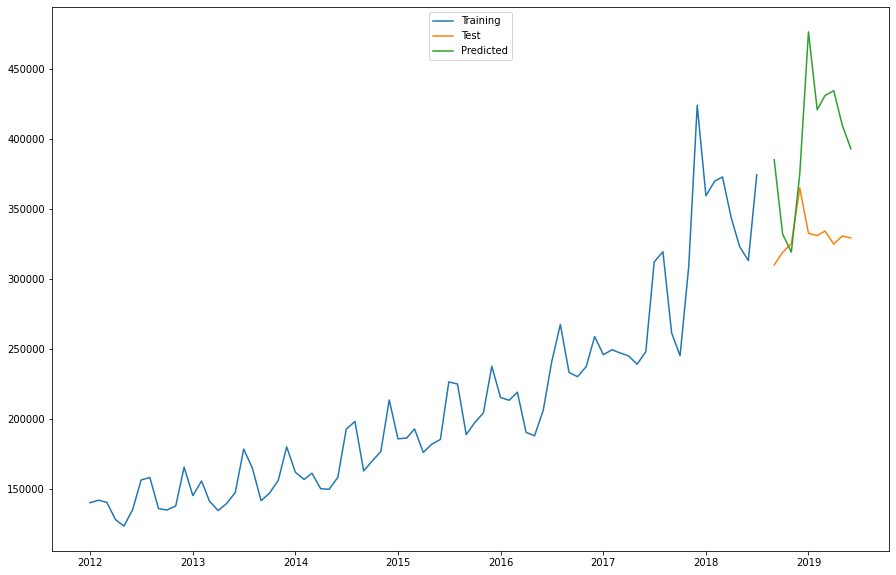

In [0]:
plt.figure(figsize=(15,10))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predicted')
plt.legend(loc='upper center')
plt.show();

In [0]:
test['Predicted_Total'] = prediction
test['Error']= test['Total']-test['Predicted_Total']
test

ERROR! Session/line number was not unique in database. History logging moved to new session 67


,Total,Predicted_Total,Error
Fecha,,,
2018-09-01,309844,384985.540773,-75141.540773
2018-10-01,318822,331860.849950,-13038.849950
2018-11-01,325101,318967.774320,6133.225680
2018-12-01,364819,374878.694871,-10059.694871
2019-01-01,332364,476162.158016,-143798.158016
2019-02-01,330865,420587.077897,-89722.077897
2019-03-01,334034,430790.190620,-96756.190620
2019-04-01,324734,434197.946300,-109463.946300
2019-05-01,330462,409771.575167,-79309.575167


In [0]:
rmse_arima=sqrt(metrics.mean_squared_error(test.Total,test.Predicted_Total ))
print(rmse_arima)

81456.80713367977


**Holt Winter**

In [0]:
train1, test1 = df1[:79], df1[80:]


In [0]:
y_hat_avg = test1.copy()
fit1 = ExponentialSmoothing(np.asarray(train1['Total']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test1))
y_hat_avg.head(10)
test1['Prediction_Holt_Winter'] =y_hat_avg['Holt_Winter']
test1['Error']= test1['Total']-y_hat_avg['Holt_Winter']
test1

,Total,Prediction_Holt_Winter,Error
Fecha,,,
2018-09-01,309844,359169.243068,-49325.243068
2018-10-01,318822,364839.292580,-46017.292580
2018-11-01,325101,373054.240192,-47953.240192
2018-12-01,364819,370331.013349,-5512.013349
2019-01-01,332364,371937.017133,-39573.017133
2019-02-01,330865,387110.265517,-56245.265517
2019-03-01,334034,386877.016711,-52843.016711
2019-04-01,324734,389681.978972,-64947.978972
2019-05-01,330462,395352.028483,-64890.028483


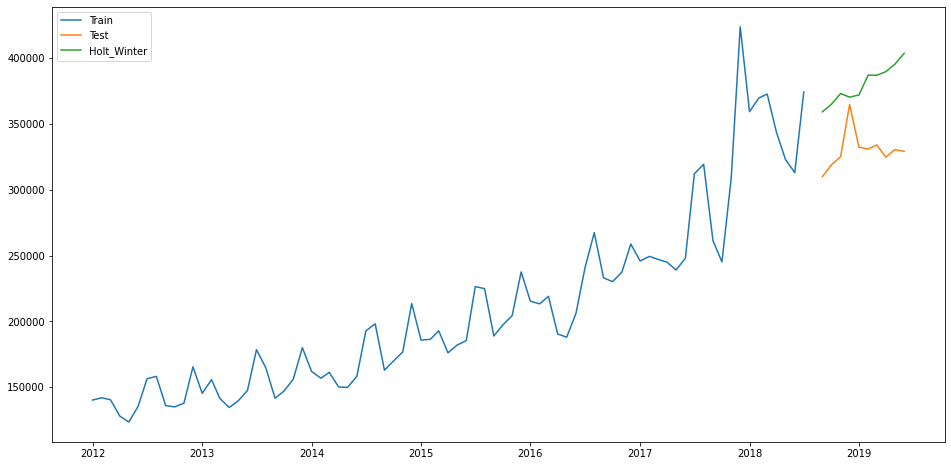

In [0]:
#dates=test.index.astype(str)

#pred = pd.Series(fit1.forecast(len(test)), index=test.index)
plt.figure(figsize=(16,8))
plt.plot( train1['Total'], label='Train')
plt.plot(test1['Total'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [0]:
rmse_Holt_Winter = sqrt(mean_squared_error(test1.Total, y_hat_avg.Holt_Winter))
print(rmse_Holt_Winter)

53264.605001926844


**Naive Forecast**

In [0]:
train2, test2 = df1[:79], df1[80:]


In [0]:
dd= np.asarray(train2.Total)
y_hat = test2.copy()
y_hat['Naive_Forecast'] = dd[len(dd)-1]
y_hat.head(10)
test2['Prediction_Naive_Forecast'] =y_hat['Naive_Forecast']

test2['Error']= test2['Total']-y_hat['Naive_Forecast']
test2


,Total,Prediction_Naive_Forecast,Error
Fecha,,,
2018-09-01,309844,374313,-64469
2018-10-01,318822,374313,-55491
2018-11-01,325101,374313,-49212
2018-12-01,364819,374313,-9494
2019-01-01,332364,374313,-41949
2019-02-01,330865,374313,-43448
2019-03-01,334034,374313,-40279
2019-04-01,324734,374313,-49579
2019-05-01,330462,374313,-43851


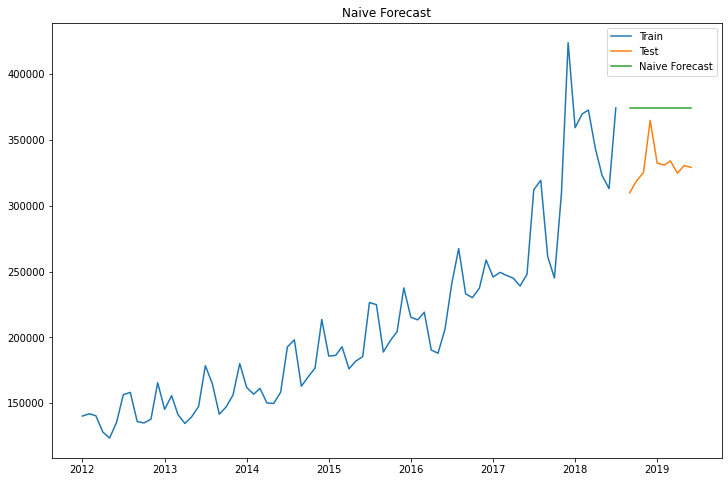

In [0]:
plt.figure(figsize=(12,8))
plt.plot(train2.index, train2['Total'], label='Train')
plt.plot(test2.index,test2['Total'], label='Test')
plt.plot(y_hat.index,y_hat['Naive_Forecast'] , label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [0]:
rmse_naive = sqrt(mean_squared_error(test2.Total, y_hat.Naive_Forecast))
print(rmse_naive)


46302.44441279531


**Simple Average**

In [0]:
train3, test3 = df1[:79], df1[80:]


In [0]:
y_hat_avgr = test3.copy()
y_hat_avgr['avg_forecast'] = train3['Total'].mean()
y_hat_avgr.head(10)
test3['Prediction_avg_forecast'] =y_hat_avgr['avg_forecast']

test3['Error']= test3['Total']-y_hat_avgr['avg_forecast']
test3

,Total,Prediction_avg_forecast,Error
Fecha,,,
2018-09-01,309844,208471.177215,101372.822785
2018-10-01,318822,208471.177215,110350.822785
2018-11-01,325101,208471.177215,116629.822785
2018-12-01,364819,208471.177215,156347.822785
2019-01-01,332364,208471.177215,123892.822785
2019-02-01,330865,208471.177215,122393.822785
2019-03-01,334034,208471.177215,125562.822785
2019-04-01,324734,208471.177215,116262.822785
2019-05-01,330462,208471.177215,121990.822785


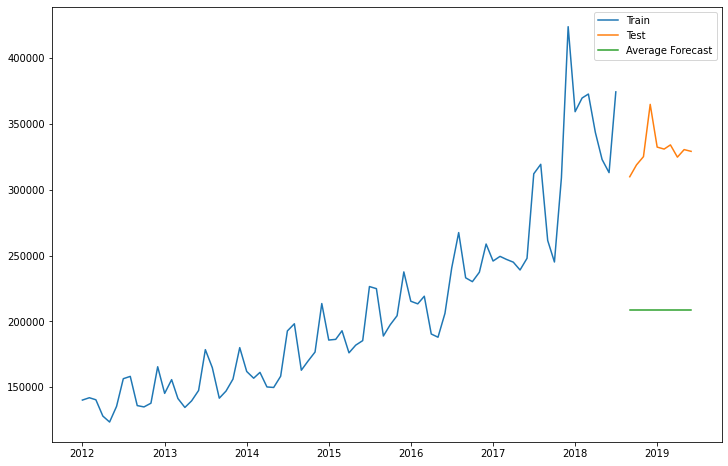

In [0]:
plt.figure(figsize=(12,8))
plt.plot(train3['Total'], label='Train')
plt.plot(test3['Total'], label='Test')
plt.plot(y_hat_avgr['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [0]:
rmse_avg_forecast = sqrt(mean_squared_error(test3.Total, y_hat_avgr.avg_forecast))
print(rmse_avg_forecast)

122292.95073474657


**Moving Average**

In [0]:
train4, test4 = df1[:79], df1[80:]


In [0]:
y_hat_avgs = test4.copy()
y_hat_avgs['moving_avg_forecast'] = train4['Total'].rolling(60).mean().iloc[-1]
y_hat_avgs.head(10)
test4['Prediction_avg_forecast'] =y_hat_avgs['moving_avg_forecast']
test4['Error']= test4['Total']-y_hat_avgs['moving_avg_forecast']
test4

,Total,Prediction_avg_forecast,Error
Fecha,,,
2018-09-01,309844,228805.916667,81038.083333
2018-10-01,318822,228805.916667,90016.083333
2018-11-01,325101,228805.916667,96295.083333
2018-12-01,364819,228805.916667,136013.083333
2019-01-01,332364,228805.916667,103558.083333
2019-02-01,330865,228805.916667,102059.083333
2019-03-01,334034,228805.916667,105228.083333
2019-04-01,324734,228805.916667,95928.083333
2019-05-01,330462,228805.916667,101656.083333


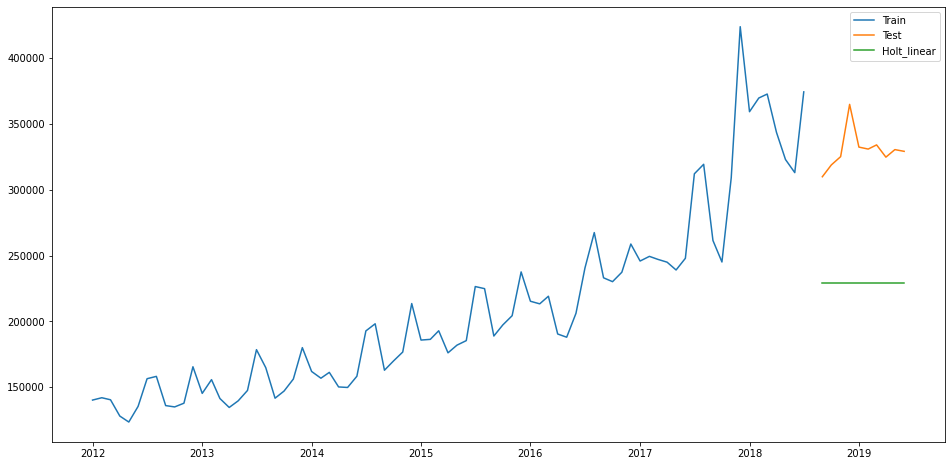

In [0]:
plt.figure(figsize=(16,8))
plt.plot(train4['Total'], label='Train')
plt.plot(test4['Total'], label='Test')
plt.plot(y_hat_avgs['moving_avg_forecast'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [0]:
rmse_moving_avg_forecast = sqrt (mean_squared_error (test4.Total, y_hat_avgs.moving_avg_forecast))
print(rmse_moving_avg_forecast)

102106.8721933394


**Holt’s Linear Trend method**

In [0]:
train5, test5 = df1[:79], df1[80:]


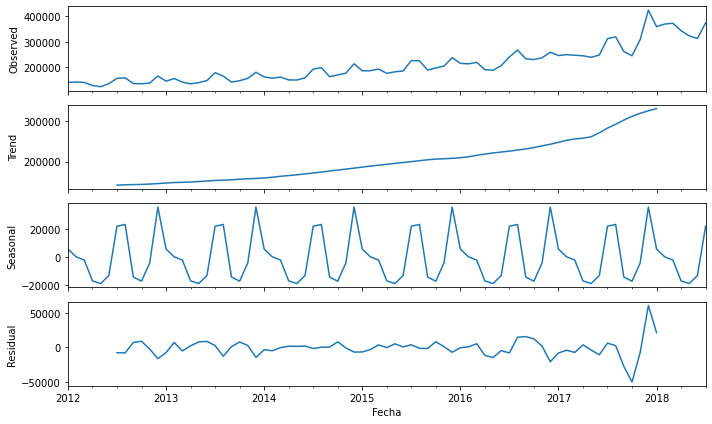

In [0]:
sm.tsa.seasonal_decompose(train5.Total).plot()
result = sm.tsa.stattools.adfuller(train5.Total)
plt.show()

In [0]:
y_hat_avga = test5.copy()

fit1 = Holt(np.asarray(train5['Total'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avga['Holt_linear'] = fit1.forecast(len(test))
y_hat_avga.head(10)
test5['Prediction_avg_forecast'] =y_hat_avga['Holt_linear']
test5['Error']= test5['Total']-y_hat_avga['Holt_linear']
test5

,Total,Prediction_avg_forecast,Error
Fecha,,,
2018-09-01,309844,366362.952153,-56518.952153
2018-10-01,318822,371817.333299,-52995.333299
2018-11-01,325101,377271.714444,-52170.714444
2018-12-01,364819,382726.095589,-17907.095589
2019-01-01,332364,388180.476735,-55816.476735
2019-02-01,330865,393634.857880,-62769.857880
2019-03-01,334034,399089.239025,-65055.239025
2019-04-01,324734,404543.620170,-79809.620170
2019-05-01,330462,409998.001316,-79536.001316


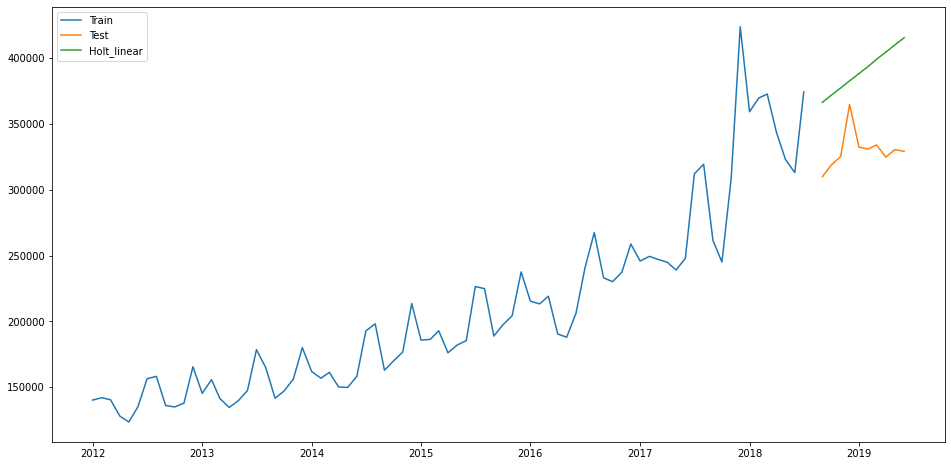

In [0]:
plt.figure(figsize=(16,8))
plt.plot(train5['Total'], label='Train')
plt.plot(test5['Total'], label='Test')
plt.plot(y_hat_avga['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [0]:
rms_Holt_linear = sqrt(mean_squared_error(test5.Total, y_hat_avga.Holt_linear))
print(rms_Holt_linear)

63623.07702899597


#### Resultados

In [0]:
print('RSS_ARIMA:',sum((results_ARIMA.fittedvalues - ts_log_diff_shifting)**2))
print('RSS_HOLT_WINTER:',sum((pred[1:]- test11[1:])**2))

RSS_ARIMA: 0.7627381643583879
RSS_HOLT_WINTER: 0.4334864833970286


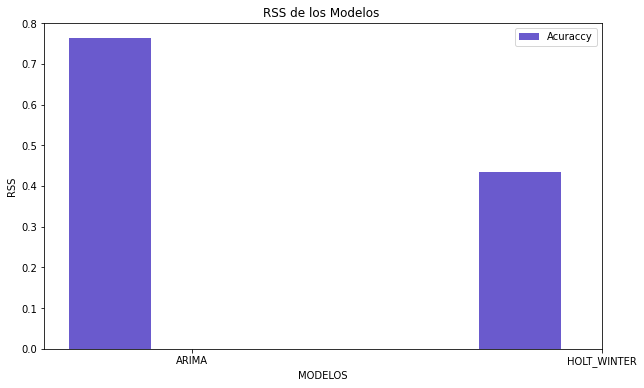

In [0]:
RSS=[sum((results_ARIMA.fittedvalues - ts_log_diff_shifting)**2),sum((pred[1:]- test11[1:])**2)]


modelos=["ARIMA", "HOLT_WINTER"]
barWidth=0.2
plt.bar(np.arange(len(RSS)), RSS, color="#6A5ACD", width=barWidth, label="Acuraccy");
plt.xlabel("MODELOS");
plt.ylabel("RSS");
plt.xticks([r + barWidth for r in range(len(RSS))], modelos);
plt.title("RSS de los Modelos ");
plt.legend();

In [0]:
print('rmse_arima:',rmse_arima)
print('rmse_Holt_Winter:',rmse_Holt_Winter)
print('rmse_avg_forecast:',rmse_avg_forecast)
print('rmse_moving_avg_forecast:',rmse_moving_avg_forecast)
print('rms_Holt_linear:',rms_Holt_linear)


rmse_arima: 81456.80713367977
rmse_Holt_Winter: 53264.605001926844
rmse_avg_forecast: 122292.95073474657
rmse_moving_avg_forecast: 102106.8721933394
rms_Holt_linear: 63623.07702899597


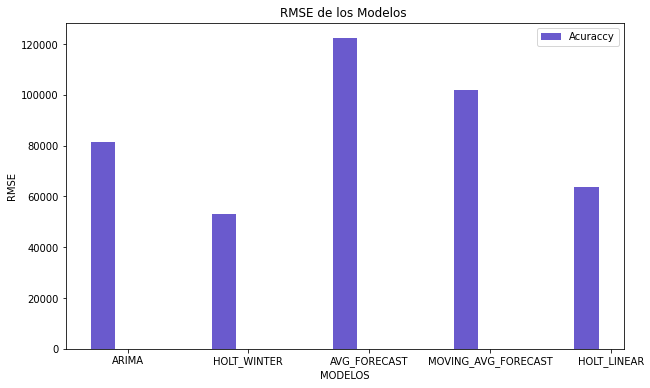

In [0]:
RMSE=[rmse_arima,rmse_Holt_Winter,rmse_avg_forecast,rmse_moving_avg_forecast,rms_Holt_linear]


modelos=["ARIMA", "HOLT_WINTER","AVG_FORECAST", "MOVING_AVG_FORECAST","HOLT_LINEAR"]
barWidth=0.2
plt.bar(np.arange(len(RMSE)), RMSE, color="#6A5ACD", width=barWidth, label="Acuraccy");
plt.xlabel("MODELOS");
plt.ylabel("RMSE");
plt.xticks([r + barWidth for r in range(len(RMSE))], modelos);
plt.title("RMSE de los Modelos ");
plt.legend();

#Conclusiones:

#### 

####

####

### Referencias